In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/SAFI_results.csv")

In [3]:
df.head()

,Column1,A01_interview_date,A03_quest_no,A04_start,A05_end,A06_province,A07_district,A08_ward,A09_village,A11_years_farm,...,F13_du_look_aftr_cows,F_liv_count,G01_no_meals,_members_count,_note,gps:Accuracy,gps:Altitude,gps:Latitude,gps:Longitude,instanceID
0,0,17/11/2016,1,2017-03-23T09:49:57.000Z,2017-04-02T17:29:08.000Z,Province1,District1,Ward2,Village2,11,...,no,1,2,3,NaN,14.0,698,-19.112259,33.483456,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,1,17/11/2016,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Province1,District1,Ward2,Village2,2,...,no,3,2,7,NaN,19.0,690,-19.112477,33.483416,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,2,17/11/2016,3,2017-04-02T14:35:26.000Z,2017-04-02T17:26:53.000Z,Province1,District1,Ward2,Village2,40,...,no,1,2,10,NaN,13.0,674,-19.112108,33.483450,uuid:193d7daf-9582-409b-bf09-027dd36f9007
3,3,17/11/2016,4,2017-04-02T14:55:18.000Z,2017-04-02T17:27:16.000Z,Province1,District1,Ward2,Village2,6,...,no,2,2,7,NaN,5.0,679,-19.112229,33.483424,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,4,17/11/2016,5,2017-04-02T15:10:35.000Z,2017-04-02T17:27:35.000Z,Province1,District1,Ward2,Village2,18,...,no,4,2,7,NaN,10.0,689,-19.112217,33.483425,uuid:2c867811-9696-4966-9866-f35c3e97d02d


In [5]:
df.C06_rooms.mean()

1.7404580152671756

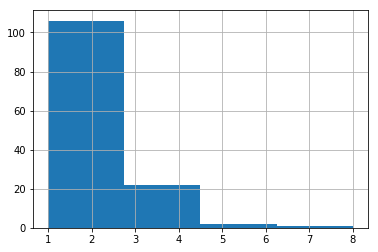

In [7]:
df.C06_rooms.hist(bins=4)

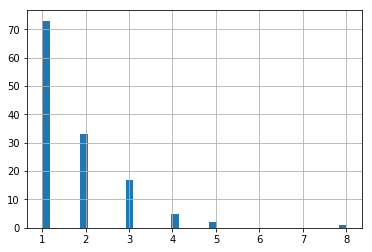

In [8]:
df.C06_rooms.hist(bins=40)

In [9]:
df.columns

Index(['Column1', 'A01_interview_date', 'A03_quest_no', 'A04_start', 'A05_end',
       'A06_province', 'A07_district', 'A08_ward', 'A09_village',
       'A11_years_farm', 'A12_agr_assoc', 'B11_remittance_money',
       'B16_years_liv', 'B17_parents_liv', 'B18_sp_parents_liv',
       'B19_grand_liv', 'B20_sp_grand_liv', 'B_no_membrs',
       'C01_respondent_roof_type', 'C02_respondent_wall_type',
       'C02_respondent_wall_type_other', 'C03_respondent_floor_type',
       'C04_window_type', 'C05_buildings_in_compound', 'C06_rooms',
       'C07_other_buildings', 'D_plots_count', 'E01_water_use',
       'E17_no_enough_water', 'E19_period_use', 'E20_exper_other',
       'E21_other_meth', 'E23_memb_assoc', 'E24_resp_assoc', 'E25_fees_water',
       'E26_affect_conflicts', 'E_no_group_count', 'E_yes_group_count',
       'F04_need_money', 'F05_money_source_other', 'F06_crops_contr',
       'F08_emply_lab', 'F09_du_labour', 'F10_liv_owned_other', 'F12_poultry',
       'F13_du_look_aftr_cows', 

In [13]:
df.groupby('C02_respondent_wall_type').C01_respondent_roof_type.count()

C02_respondent_wall_type
burntbricks    67
cement          1
muddaub        46
sunbricks      17
Name: C01_respondent_roof_type, dtype: int64

C02_respondent_wall_type
burntbricks    AxesSubplot(0.125,0.125;0.775x0.755)
cement         AxesSubplot(0.125,0.125;0.775x0.755)
muddaub        AxesSubplot(0.125,0.125;0.775x0.755)
sunbricks      AxesSubplot(0.125,0.125;0.775x0.755)
Name: C01_respondent_roof_type, dtype: object

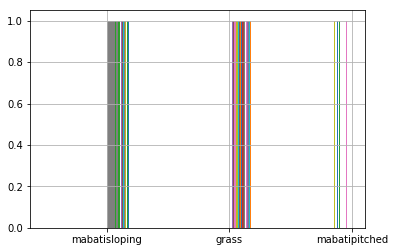

In [17]:
df.groupby('C02_respondent_wall_type').C01_respondent_roof_type.hist()

In [24]:
df[ ["gps:Latitude", "gps:Longitude"] ].plot.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

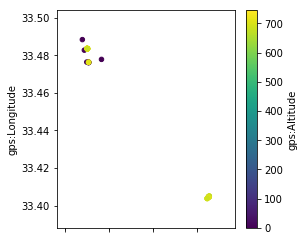

In [35]:
df.plot.scatter(x='gps:Latitude', y='gps:Longitude', c='gps:Altitude', colormap="viridis", figsize=[4,4])

In [ ]:
# %load code/plots
# Make a scatter plot of 'A11_years_farm' vs 'B16_years_liv' and color the points
# by 'C05_buildings_in_compound'
#


# Make a bar plot of the mean number of rooms per wall type

# extension: try by wall and roof type?


In [50]:
df.groupby("C02_respondent_wall_type")["C06_rooms"].mean()

C02_respondent_wall_type
burntbricks    2.104478
cement         3.000000
muddaub        1.260870
sunbricks      1.529412
Name: C06_rooms, dtype: float64

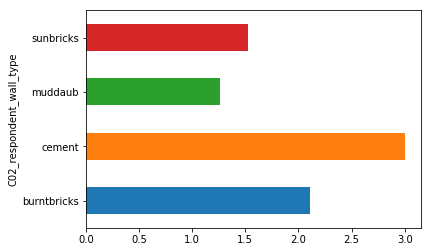

In [56]:
ax = df.groupby("C02_respondent_wall_type")["C06_rooms"].mean().plot(kind="barh")

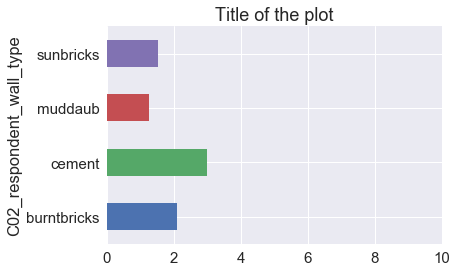

In [78]:
import seaborn as sns
sns.set(font_scale=1.5)

ax = df.groupby("C02_respondent_wall_type")["C06_rooms"].mean().plot(kind="barh", 
                                                                     title="Title of the plot",
                                                                     xlim=[0,10])

plt.savefig("rooms.png")
plt.savefig("rooms.pdf", bbox_inches="tight", dpi=600)
plt.show()

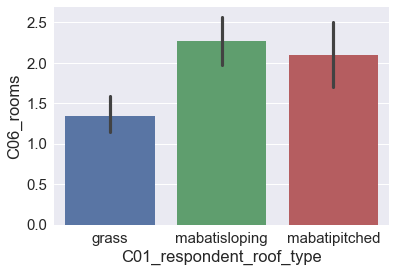

In [80]:
sns.barplot(data=df, x="C01_respondent_roof_type", y="C06_rooms")

In [52]:
df.groupby(["C01_respondent_roof_type", "C02_respondent_wall_type"])["C06_rooms"].mean()

C01_respondent_roof_type  C02_respondent_wall_type
grass                     burntbricks                 1.681818
                          muddaub                     1.214286
                          sunbricks                   1.111111
mabatipitched             burntbricks                 2.166667
                          muddaub                     2.000000
                          sunbricks                   2.000000
mabatisloping             burntbricks                 2.333333
                          cement                      3.000000
                          muddaub                     1.000000
                          sunbricks                   2.000000
Name: C06_rooms, dtype: float64

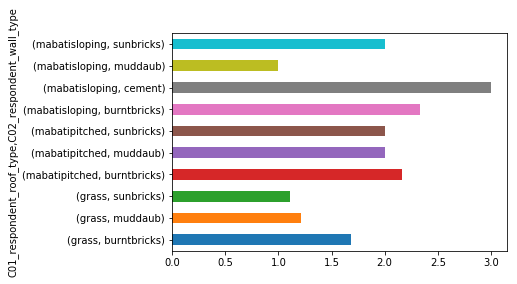

In [54]:
df.groupby(["C01_respondent_roof_type", "C02_respondent_wall_type"])["C06_rooms"].mean().plot(kind="barh")

In [36]:
df.columns

Index(['Column1', 'A01_interview_date', 'A03_quest_no', 'A04_start', 'A05_end',
       'A06_province', 'A07_district', 'A08_ward', 'A09_village',
       'A11_years_farm', 'A12_agr_assoc', 'B11_remittance_money',
       'B16_years_liv', 'B17_parents_liv', 'B18_sp_parents_liv',
       'B19_grand_liv', 'B20_sp_grand_liv', 'B_no_membrs',
       'C01_respondent_roof_type', 'C02_respondent_wall_type',
       'C02_respondent_wall_type_other', 'C03_respondent_floor_type',
       'C04_window_type', 'C05_buildings_in_compound', 'C06_rooms',
       'C07_other_buildings', 'D_plots_count', 'E01_water_use',
       'E17_no_enough_water', 'E19_period_use', 'E20_exper_other',
       'E21_other_meth', 'E23_memb_assoc', 'E24_resp_assoc', 'E25_fees_water',
       'E26_affect_conflicts', 'E_no_group_count', 'E_yes_group_count',
       'F04_need_money', 'F05_money_source_other', 'F06_crops_contr',
       'F08_emply_lab', 'F09_du_labour', 'F10_liv_owned_other', 'F12_poultry',
       'F13_du_look_aftr_cows', 